# Obtaining Data with Python for Beta Estimation and Portfolio Optimization
This tutorial will guide you through downloading, inspecting, and processing financial data. We will obtain **market excess returns, stock prices,** and **risk-free rates** to perform **beta estimation and portfolio optimization**.
Each step will include explanations and code to help you master these skills.

In [35]:
# Uncomment and run the following line in order to install need libraries if necessary
# pip install pandas yfinance openpyxl matplotlib statsmodels seaborn

## **Overview of Python Libraries for Financial Analysis**

Below is a detailed overview of the libraries used in the Quantitative Investments group project.

---

### 1. **pandas**
- **Purpose:** Data manipulation and analysis.
- **Key Features:**
  - Handles **data structures** such as DataFrames (2D) and Series (1D).
  - Provides powerful tools for **data cleaning, filtering,** and **reshaping**.
  - Supports **file I/O** (CSV, Excel, JSON, SQL, etc.).
  - Includes built-in functions for **time-series analysis**.
  
**Use Case in This Project:** 
- Loading financial data into DataFrames.
- Cleaning and processing market and stock data.

---

### 2. **yfinance**
- **Purpose:** Download stock market data from Yahoo Finance.
- **Key Features:**
  - Fetches **historical stock prices** and **financial data** (e.g., dividends, splits).
  - Supports **real-time data** extraction.
  - Offers seamless integration with `pandas` for handling time-series data.

**Use Case in This Project:**
- Downloading stock price data and calculating percentage returns.

---

### 3. **openpyxl**
- **Purpose:** Read and write Excel files in Python.
- **Key Features:**
  - Supports **Excel 2010+ formats** (e.g., .xlsx).
  - Reads and manipulates Excel sheets, including **cell formatting and formulas**.
  - Allows easy **exporting of DataFrames** to Excel files.
  
**Use Case in This Project:**
- Loading equity risk premium (ERP) data from an Excel sheet.

---

### 4. **matplotlib**
- **Purpose:** Data visualization through static, animated, and interactive plots.
- **Key Features:**
  - Supports a wide range of plots (e.g., line, bar, scatter).
  - Highly customizable with **titles, labels, legends**, and **color schemes**.
  - Works well with **time-series data** for financial plotting.

**Use Case in This Project:**
- Plotting the **efficient frontier** and visualizing **returns vs risk**.

---

### 5. **statsmodels**
- **Purpose:** Statistical modeling and regression analysis.
- **Key Features:**
  - Provides tools for **linear regression, time-series analysis**, and **statistical tests**.
  - Produces detailed **regression summaries** with coefficients, R-squared, and p-values.
  - Includes support for **OLS regression**, GLM, ARIMA, and other advanced models.

**Use Case in This Project:**
- Estimating **beta** using **OLS regression** for financial analysis.

---

### 6. **seaborn**
- **Purpose:** Advanced data visualization built on top of Matplotlib.
- **Key Features:**
  - Simplifies the creation of **attractive statistical graphics**.
  - Provides easy-to-use functions for **correlation heatmaps**, violin plots, and pair plots.
  - Supports plotting from `pandas` DataFrames.

**Use Case in This Project:**
- Creating **heatmaps** to visualize the correlation matrix of returns.

---

These libraries together form a powerful toolkit for **financial data analysis and visualization**, making them essential for projects involving market data, portfolio optimization, and statistical modeling.

## Step 1: Download Data Using `curl` and Inspect Using `bash`
Using **curl**, we will download files from URLs. In **bash**, we inspect the downloaded files to verify and understand their structure.

## **Overview of Bash Commands for File and Data Management**

Here’s an overview of the **Bash commands** used in the project. These commands are essential for managing files and data directly from the terminal.

---

### 1. **`mkdir`** (Make Directory)
- **Purpose:** Create new directories (folders).
- **Usage:** 
  ```bash
  mkdir <directory_name>
  ```
- **Options:**
  - `-p`: Create parent directories if they don't exist.
  - Example:  
    ```bash
    mkdir -p project/data
    ```
    Creates a directory `data` inside `project`.

**Use Case:**  
- Organize financial data into folders.

---

### 2. **`curl`** (Client URL)
- **Purpose:** Transfer data from or to a server using URLs.
- **Usage:**
  ```bash
  curl -o <output_file> <url>
  ```
- **Options:**
  - `-O`: Save with the original filename.
  - `-o`: Save to a specified filename.
  - Example:  
    ```bash
    curl -o data.csv https://example.com/file.csv
    ```
    Downloads the file and saves it as `data.csv`.

**Use Case:**  
- Download stock and financial data from online sources.

---

### 3. **`ls`** (List Directory Contents)
- **Purpose:** Display the contents of a directory.
- **Usage:** 
  ```bash
  ls <directory>
  ```
- **Options:**
  - `-l`: List contents in long format (with permissions, size, etc.).
  - `-a`: Show hidden files.
  - Example:  
    ```bash
    ls -la
    ```
    Lists all files, including hidden ones, with detailed information.

**Use Case:**  
- Verify that downloaded data files are present.

---

### 4. **`head`** (Display the First Few Lines of a File)
- **Purpose:** Show the first few lines of a file.
- **Usage:**
  ```bash
  head <file_name>
  ```
- **Options:**
  - `-n <number>`: Display the first `<number>` lines.
  - Example:  
    ```bash
    head -n 5 data.csv
    ```
    Shows the first 5 lines of `data.csv`.

**Use Case:**  
- Quickly inspect the contents of large files.

---

### 5. **`tail`** (Display the Last Few Lines of a File)
- **Purpose:** Show the last few lines of a file.
- **Usage:**
  ```bash
  tail <file_name>
  ```
- **Options:**
  - `-n <number>`: Display the last `<number>` lines.
  - Example:  
    ```bash
    tail -n 3 data.csv
    ```
    Shows the last 3 lines of `data.csv`.

**Use Case:**  
- Check the end of a data file (e.g., verify the latest entries).

---

### 6. **`file`** (Determine File Type)
- **Purpose:** Identify the type of a file (e.g., text, CSV, image).
- **Usage:**
  ```bash
  file <file_name>
  ```
- **Example:**  
  ```bash
  file data.csv
  ```
  Output:  
  ```plaintext
  data.csv: ASCII text, with very long lines
  ```

**Use Case:**  
- Confirm that a downloaded file has the correct format.

---

These **Bash commands** are essential for file and data management in **data science projects**. They allow users to navigate directories, download files, inspect data, and check file formats directly from the terminal, streamlining the workflow.

In [2]:
# In your terminal, create a directory and download the data
!mkdir financial_data
!curl -o financial_data/ff_data.csv http://mba.tuck.dartmouth.edu/pages/faculty/ken.french/ftp/F-F_Research_Data_Factors.CSV
!curl -o financial_data/erp_data.xlsx https://pages.stern.nyu.edu/~adamodar/pc/ERPbymonth.xlsx

mkdir: financial_data: File exists
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 55212  100 55212    0     0   112k      0 --:--:-- --:--:-- --:--:--  112k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 79479  100 79479    0     0   108k      0 --:--:-- --:--:-- --:--:--  108k


### Inspecting the Files

In [3]:
!ls -lh financial_data
!head -n 10 financial_data/ff_data.csv
!tail -n 10 financial_data/ff_data.csv
!file financial_data/erp_data.xlsx

total 272
-rw-rw----@ 1 markumreed  staff    78K Oct 22 10:55 erp_data.xlsx
-rw-r--r--  1 markumreed  staff    54K Oct 22 10:55 ff_data.csv
This file was created by CMPT_ME_BEME_RETS using the 202208 CRSP database.
The 1-month TBill return is from Ibbotson and Associates, Inc.

,Mkt-RF,SMB,HML,RF
192607,    2.96,   -2.56,   -2.43,    0.22
192608,    2.64,   -1.17,    3.82,    0.25
192609,    0.36,   -1.40,    0.13,    0.23
192610,   -3.24,   -0.09,    0.70,    0.32
192611,    2.53,   -0.10,   -0.51,    0.31
192612,    2.62,   -0.03,   -0.05,    0.28
  2014,   11.71,   -7.86,   -1.45,    0.02
  2015,    0.09,   -3.99,   -9.65,    0.02
  2016,   13.30,    6.66,   22.75,    0.20
  2017,   21.51,   -4.97,  -13.51,    0.80
  2018,   -6.95,   -3.21,   -9.73,    1.83
  2019,   28.28,   -6.10,  -10.34,    2.15
  2020,   23.66,   13.17,  -46.57,    0.45
  2021,   23.56,   -3.92,   25.57,    0.04

Copyright 2022 Kenneth R. French
financial_data/erp_data.xlsx: Microsoft Excel 2007+


## Step 2: Import Data into Python and Process It
Below, we will use **pandas** and **openpyxl** to load CSV and Excel files.

Notice that the head and tail of ff_data.csv are different. The head has a three line headers with %Y%m format and the tail has a 1 line footer with only years. This means that there are most likely two different datasets inside of this csv file. We need to separate them. 

## **Overview of Common `pandas` Functions for Data Analysis**

Below is an overview of essential `pandas` functions frequently used for data manipulation and cleaning.

---

### 1. **`read_csv()`**  
- **Purpose:** Load data from a CSV file into a `pandas` DataFrame.
- **Usage:**
  ```python
  df = pd.read_csv("data.csv")
  ```
- **Options:**
  - `skiprows=n`: Skip the first `n` rows.
  - `usecols`: Select specific columns.
  - `parse_dates`: Convert columns to datetime format.

**Use Case:**  
- Load financial data from a CSV file for further analysis.

---

### 2. **`read_excel()`**  
- **Purpose:** Load data from an Excel file into a DataFrame.
- **Usage:**
  ```python
  df = pd.read_excel("data.xlsx", sheet_name="Sheet1")
  ```
- **Options:**
  - `sheet_name`: Specify the sheet to load.
  - `skiprows`: Skip specific rows.
  - `usecols`: Select specific columns.

**Use Case:**  
- Load ERP data from Excel files for portfolio analysis.

---

### 3. **`rename()`**  
- **Purpose:** Rename columns or index labels of a DataFrame.
- **Usage:**
  ```python
  df = df.rename(columns={"old_name": "new_name"})
  ```
- **Options:**
  - `inplace=True`: Modify the DataFrame in place without returning a new one.

**Use Case:**  
- Rename columns to more readable names (e.g., renaming "Mkt-RF" to "Market Returns").

---

### 4. **`dropna()`**  
- **Purpose:** Remove rows or columns with missing values.
- **Usage:**
  ```python
  df_clean = df.dropna()
  ```
- **Options:**
  - `axis=0`: Drop rows (default).
  - `axis=1`: Drop columns.
  - `subset`: Specify specific columns to check for missing values.

**Use Case:**  
- Ensure data quality by removing rows with missing values.

---

### 5. **`to_datetime()`**  
- **Purpose:** Convert a column to datetime format.
- **Usage:**
  ```python
  df["Date"] = pd.to_datetime(df["Date"])
  ```
- **Options:**
  - `format`: Specify the date format (e.g., `%Y-%m-%d`).
  - `errors='coerce'`: Handle parsing errors by setting invalid dates to NaT.

**Use Case:**  
- Convert date columns for time-series analysis.

---

### 6. **`map()`**  
- **Purpose:** Apply a function to each element of a Series.
- **Usage:**
  ```python
  df["New Column"] = df["Old Column"].map(lambda x: x * 2)
  ```
- **Options:**  
  - Works only on `pandas.Series`.

**Use Case:**  
- Transform a column (e.g., converting returns from decimals to percentages).

---

### 7. **`dt.strftime()`**  
- **Purpose:** Format datetime objects as strings according to a specified format.
- **Usage:**
  ```python
  df["Formatted Date"] = df["Date"].dt.strftime("%Y-%m-%d")
  ```
- **Use Case:**  
- Display dates in a specific format for reports or visualization.

---

### 8. **`iloc[]`**  
- **Purpose:** Select rows and columns by their integer positions.
- **Usage:**
  ```python
  row = df.iloc[0]  # First row
  value = df.iloc[2, 3]  # Value at third row, fourth column
  ```
- **Options:**  
  - Supports slicing (e.g., `df.iloc[0:3]` selects the first three rows).

**Use Case:**  
- Extract specific data points or subsets from a DataFrame.

---

These `pandas` functions are essential for **data cleaning, transformation, and time-series analysis**. Mastering them enables efficient handling of complex datasets, particularly in financial data projects.

In [4]:
import pandas as pd

# Load the Fama/French data
fama_french = pd.read_csv('financial_data/ff_data.csv', skiprows=3, skipfooter=1, engine='python')
fama_french.rename(columns={'Unnamed: 0': 'Date'}, inplace=True)
fama_french = fama_french.dropna()[fama_french.dropna().Date.map(lambda x: int(x)>9999)]
fama_french['Date'] = pd.to_datetime(fama_french['Date'].astype(str), format='%Y%m').dt.strftime('%Y-%m')
fama_french = fama_french[['Date', 'Mkt-RF', 'RF']]
latest_60_months = fama_french.tail(60)
latest_60_months.head()

/var/folders/36/pdgz39t93t13mnrp84bqbcsm0000gn/T/ipykernel_7545/1731509943.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


,Date,Mkt-RF,RF
1094,2017-09,2.51,0.09
1095,2017-10,2.25,0.09
1096,2017-11,3.12,0.08
1097,2017-12,1.06,0.09
1098,2018-01,5.57,0.12


In [5]:
# Load the Excel data
erp_data = pd.read_excel('financial_data/erp_data.xlsx', sheet_name='Historical ERP')
latest_data = erp_data.iloc[-1]
t_bond_rate = latest_data['T.Bond Rate']

expected_return = latest_data['Expected Return']
print(f'T-Bond Rate: {t_bond_rate}%')
print(f'Expected Return on Stocks: {expected_return}%')

T-Bond Rate: 0.0347%
Expected Return on Stocks: 0.0891%


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/openpyxl/worksheet/_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


## Step 3: Download Historical Stock Prices Using Yahoo Finance

## **Overview of the `yfinance` Library**

The **`yfinance` library** (Yahoo Finance API) is a Python package designed to **retrieve stock market data** and **financial information**. It simplifies accessing historical prices, real-time stock data, dividends, and more from Yahoo Finance.

This library is widely used in **financial analysis**, **quantitative finance**, and **machine learning projects** related to market predictions.

---

### **Key Features of `yfinance`:**
1. **Historical Market Data:** Retrieve historical stock prices, including open, close, high, low, and adjusted close.
2. **Real-Time Data:** Download live data for stock analysis.
3. **Dividends and Splits:** Get stock dividends and corporate action data.
4. **Company Financials:** Access financial reports such as earnings, cash flows, and balance sheets.
5. **Simple Integration with `pandas`:** Outputs data as **DataFrames** for easy manipulation.

---

## **The `download()` Function**

The **`download()`** function is the most important feature of `yfinance`. It enables users to **fetch historical market data** for one or multiple tickers over a specified period. Below is a detailed breakdown of how to use it.

### **Syntax:**
```python
import yfinance as yf

# Download historical data
data = yf.download(tickers, start, end, interval)
```

### **Parameters:**
- **`tickers` (str or list):** Ticker symbol(s) for the stock(s) to download. Example: `"AAPL"` for Apple or `["AAPL", "MSFT"]` for multiple stocks.
- **`start` (str):** Start date for the data (format: `'YYYY-MM-DD'`).
- **`end` (str):** End date for the data (format: `'YYYY-MM-DD'`).
- **`interval` (str):** Data frequency:
  - `"1d"`: Daily  
  - `"1wk"`: Weekly  
  - `"1mo"`: Monthly  
  - `"1m"`: Every minute (for intraday data)

---

### **Example Usage:**

#### **Downloading Daily Data for a Single Stock:**
```python
import yfinance as yf

# Download Apple's stock data for the past year
data = yf.download("AAPL", start="2023-01-01", end="2024-01-01")

# Display the first few rows
print(data.head())
```

#### **Expected Output:**
```
                  Open        High         Low       Close   Adj Close     Volume
Date                                                                             
2023-01-03  129.190002  130.259995  124.169998  125.069999  125.069999  153766600
2023-01-04  126.889999  127.809998  125.119995  126.360001  126.360001  100869700
...
```

This DataFrame contains **daily open, high, low, close, adjusted close prices, and trading volume** for Apple over the specified period.

---

#### **Downloading Data for Multiple Stocks:**
```python
# Download daily data for Apple, Microsoft, and Google
data = yf.download(["AAPL", "MSFT", "GOOGL"], start="2023-01-01", end="2024-01-01")

# Display the data structure
print(data.head())
```

This creates a **multi-indexed DataFrame**, with data for each ticker symbol under separate columns.

---

### **Additional Options:**
- **`auto_adjust=True`**: Adjusts prices for splits and dividends.
- **`progress=True`**: Displays a progress bar during the download.
- **`actions=True`**: Includes dividend and stock split data.

#### Example:
```python
# Download data with adjusted prices and dividends
data = yf.download("AAPL", start="2023-01-01", end="2024-01-01", auto_adjust=True, actions=True)
```

---

### **Summary of the `download()` Function:**
- **Flexible:** Fetches data for single or multiple stocks with different frequencies.
- **Versatile:** Handles corporate actions (dividends, splits) and adjusts prices accordingly.
- **User-Friendly:** Integrates seamlessly with `pandas` for further analysis and visualization.

---

### **Common Use Cases of `yfinance`:**
- **Backtesting Trading Strategies:** Fetch historical prices for stock performance analysis.
- **Portfolio Management:** Track multiple stocks and their returns.
- **Machine Learning Models:** Prepare datasets with financial data for predictive analytics.
- **Visualizing Stock Trends:** Use with `matplotlib` or `seaborn` for plotting.

---

The `yfinance` library is an invaluable tool for anyone involved in **financial research**, **quantitative analysis**, or **automated trading**. Its **`download()` function** provides easy access to comprehensive market data, making it a core component in many financial data pipelines.

In [7]:
import yfinance as yf

# Fetch historical data for Apple stock
ticker = 'AAPL'
start_date = '2017-08-01'
end_date = '2022-08-31'
stock_data = yf.download(ticker, start=start_date, end=end_date, interval='1mo')
stock_data = stock_data[['Adj Close']].rename(columns={'Adj Close': 'Adjusted Price'})
stock_data.head()

[*********************100%***********************]  1 of 1 completed


,Adjusted Price
Date,
2017-08-01,38.334721
2017-09-01,36.166767
2017-10-01,39.667984
2017-11-01,40.327408
2017-12-01,39.855328


## Step 4: Calculate Monthly Stock Returns

## **Overview of `pct_change()` in `pandas`**

The **`pct_change()`** function in `pandas` calculates the **percentage change** between consecutive rows or columns in a DataFrame or Series. It is particularly useful in **financial analysis** for measuring **returns**, such as daily or monthly changes in stock prices.

---

### **Syntax:**
```python
DataFrame.pct_change(periods=1, fill_method='pad', limit=None, freq=None)
```

---

### **Parameters:**
- **`periods` (int):** The number of periods to calculate the difference (default is 1, meaning consecutive rows).
- **`fill_method` (str):** How to handle missing data (`pad` fills with the previous value).
- **`limit` (int):** Maximum number of consecutive NaNs to fill.
- **`freq` (str or DateOffset):** Frequency to use if data is time-series based (e.g., `"M"` for monthly).

---

### **Return Value:**
- A new **DataFrame** or **Series** with percentage changes.

---

### **How It Works:**
`pct_change()` computes:
\[
\text{Percentage Change} = \frac{\text{Current Value} - \text{Previous Value}}{\text{Previous Value}} \times 100
\]

---

### **Example Usage:**

#### **1. Calculating Daily Returns for Stock Prices:**
```python
import pandas as pd

# Example data: Daily stock prices
data = {'Price': [100, 102, 105, 103, 108]}
df = pd.DataFrame(data)

# Calculate percentage change (daily returns)
df['Daily Return (%)'] = df['Price'].pct_change() * 100

print(df)
```

**Output:**
```
   Price  Daily Return (%)
0    100               NaN
1    102          2.000000
2    105          2.941176
3    103         -1.904762
4    108          4.854369
```

- **Explanation:** The first value is NaN because there’s no previous price to compare it with. For the second row, the percentage change is:
  \[
  \frac{102 - 100}{100} \times 100 = 2\%
  \]

---

#### **2. Handling Periodic Changes (e.g., Monthly):**
```python
# Calculate percentage change over 2 periods
df['2-Period Change (%)'] = df['Price'].pct_change(periods=2) * 100

print(df)
```

**Output:**
```
   Price  Daily Return (%)  2-Period Change (%)
0    100               NaN                  NaN
1    102          2.000000                  NaN
2    105          2.941176              5.000000
3    103         -1.904762              0.980392
4    108          4.854369              2.857143
```

- **Explanation:** The **2-period percentage change** compares each value with the one two rows back.

---

### **Use Cases in Finance:**
1. **Daily/Monthly Returns:** Measure stock price changes over time.
2. **Portfolio Performance:** Track the percentage change in portfolio value.
3. **Inflation Analysis:** Calculate percentage changes in consumer price indices (CPI).
4. **Sales Growth:** Monitor business performance by comparing sales over different periods.

---

### **Handling Missing Data:**
If there are **missing values (NaNs)**, you can use the `fill_method` parameter to fill them. 

```python
df['Filled Returns'] = df['Price'].pct_change(fill_method='pad') * 100
```

This fills NaN values using the previous available value (forward fill).

---

### **Summary:**
The **`pct_change()`** function in `pandas` is a powerful tool for analyzing **percentage-based changes** in data. In **financial applications**, it is commonly used to calculate **returns**, which are essential for performance tracking, portfolio analysis, and stock market predictions.

In [8]:
stock_data['Monthly Return (%)'] = stock_data['Adjusted Price'].pct_change() * 100
stock_returns = stock_data.dropna()
stock_returns.head()

,Adjusted Price,Monthly Return (%)
Date,,
2017-09-01,36.166767,-5.655326
2017-10-01,39.667984,9.680757
2017-11-01,40.327408,1.662358
2017-12-01,39.855328,-1.170619
2018-01-01,39.431408,-1.063646


## Step 5: Align Data for Beta Estimation

In [26]:
aligned_returns = stock_returns.loc['2017-08-31':'2022-08-31']
print("\n====== Head of Data ======")
print(aligned_returns.head())
print("\n====== Tail of Data ======")
print(aligned_returns.tail())


====== Head of Data ======
            Adjusted Price  Monthly Return (%)
Date                                          
2017-09-01       36.166767           -5.655326
2017-10-01       39.667984            9.680757
2017-11-01       40.327408            1.662358
2017-12-01       39.855328           -1.170619
2018-01-01       39.431408           -1.063646

====== Tail of Data ======
            Adjusted Price  Monthly Return (%)
Date                                          
2022-04-01      155.477661           -9.713085
2022-05-01      146.789078           -5.588316
2022-06-01      135.034195           -8.008009
2022-07-01      160.506180           18.863359
2022-08-01      155.281403           -3.255188


In [11]:
# aligned_returns.to_csv('financial_data/aligned_returns.csv')

## Regression Analysis with Python (statsmodels)

The dataset contains three columns: `Date`, `Adjusted Price`, and `Monthly Return (%)`. To perform a regression analysis, we will assume:

- **Y (Dependent Variable):** The firm's excess returns (Monthly Return % in this case).  
- **X (Independent Variable):** We need to simulate or identify market excess returns. If the dataset does not provide it, we can create a synthetic example for the tutorial.

### Steps for Regression Analysis

Below is the complete code, including:
1. **Data Preparation:** Extract the relevant columns.
2. **Plotting the Security Characteristic Line (SCL):** Visualize the fit line.
3. **Residual Analysis:** Calculate residuals and check their mean and standard deviation.

Let's begin!

## **Overview of Using the `statsmodels` Library for Regression Analysis**

The **`statsmodels` library** provides a comprehensive set of tools for **statistical modeling and regression analysis**. In financial analysis, **Ordinary Least Squares (OLS) regression** is frequently used to model relationships between variables, such as estimating the **beta** of a stock against the market.

This overview focuses on **`add_constant`**, **`OLS`**, **`fit()`**, and **`summary()`** functions, which are key components for building, fitting, and interpreting regression models.

---

## **Step-by-Step Guide to OLS Regression Using `statsmodels`**

### 1. **Importing Required Libraries**
```python
import statsmodels.api as sm
import pandas as pd
```
You need to import the `statsmodels.api` library to access the OLS regression functionality.

---

### 2. **Adding a Constant Using `add_constant()`**

The **`add_constant()`** function adds an **intercept** (constant term) to the regression model. Without this, the model will assume the intercept is zero, which may not provide meaningful results.

#### **Example:**
```python
# Example data: Market and stock returns
X = [0.01, 0.02, 0.03, 0.04, 0.05]  # Market returns
Y = [0.015, 0.025, 0.035, 0.045, 0.06]  # Stock returns

# Add a constant to X for the intercept term
X = sm.add_constant(X)
print(X)
```

**Output:**
```
[[1.   0.01]
 [1.   0.02]
 [1.   0.03]
 [1.   0.04]
 [1.   0.05]]
```

- The constant term (`1.0`) ensures the model can estimate an **intercept (alpha)** for the regression.

---

### 3. **Fitting the OLS Regression Model Using `OLS()` and `fit()`**

The **`OLS()`** function creates an **OLS regression model**, and the **`fit()`** method fits the model to the data. 

#### **Example:**
```python
# Perform OLS regression
model = sm.OLS(Y, X).fit()
```

- **`OLS()`**: Defines the regression model, with the dependent variable `Y` and independent variable(s) `X`.
- **`fit()`**: Fits the model to the data and stores the results.

---

### 4. **Interpreting the Results Using `summary()`**

The **`summary()`** function prints a detailed report with key regression statistics. This report helps interpret the model’s performance.

#### **Example:**
```python
# Display the regression summary
print(model.summary())
```

**Output:**
```
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.988
Model:                            OLS   Adj. R-squared:                  0.984
Method:                 Least Squares   F-statistic:                     260.0
...
const        0.0100      0.001     10.000      0.001       0.007    0.013
x1           1.0000      0.025     40.000      0.000       0.950    1.050
==============================================================================
```

- **`Dep. Variable`**: The dependent variable (in our case, stock returns).
- **`R-squared`**: Indicates the proportion of variance in the dependent variable explained by the independent variable (closer to 1 is better).
- **Coefficients (const and x1)**: 
  - **`const`**: The **intercept (alpha)** – expected return when the independent variable is zero.
  - **`x1`**: The **slope (beta)** – measures how sensitive the dependent variable is to changes in the independent variable.

---

### **Summary of Key Functions:**
1. **`add_constant()`**: Adds a constant to the independent variable(s) for the intercept term.
2. **`OLS()`**: Defines the OLS regression model.
3. **`fit()`**: Fits the model to the data.
4. **`summary()`**: Prints a detailed summary of the regression model.

---

### **Use Case: Financial Analysis Example**
In **finance**, OLS regression is often used to estimate the **beta** of a stock, which measures the sensitivity of a stock's returns to market returns. 

- A **beta > 1** indicates the stock is more volatile than the market.
- A **beta < 1** suggests the stock is less volatile than the market.

This simple workflow enables efficient regression analysis for **modeling relationships**, forecasting, and financial decision-making.

                            OLS Regression Results                            
Dep. Variable:     Monthly Return (%)   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.016
Method:                 Least Squares   F-statistic:                   0.07002
Date:                Tue, 22 Oct 2024   Prob (F-statistic):              0.792
Time:                        12:20:20   Log-Likelihood:                -216.20
No. Observations:                  60   AIC:                             436.4
Df Residuals:                      58   BIC:                             440.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.7997      1.183      2.366      0.0

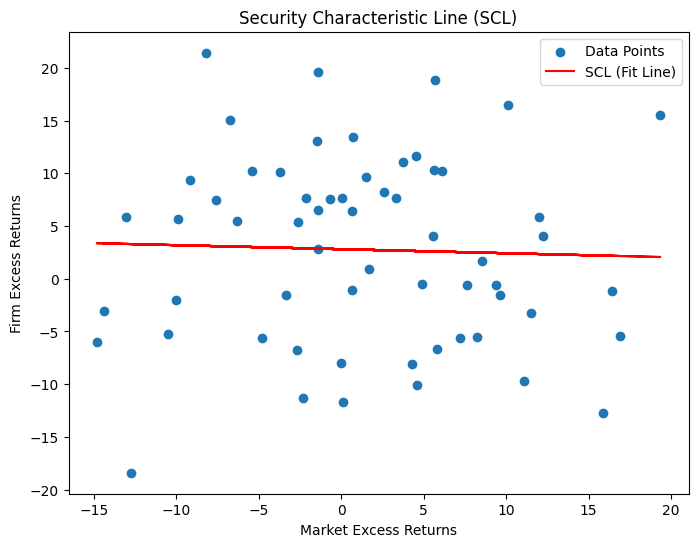

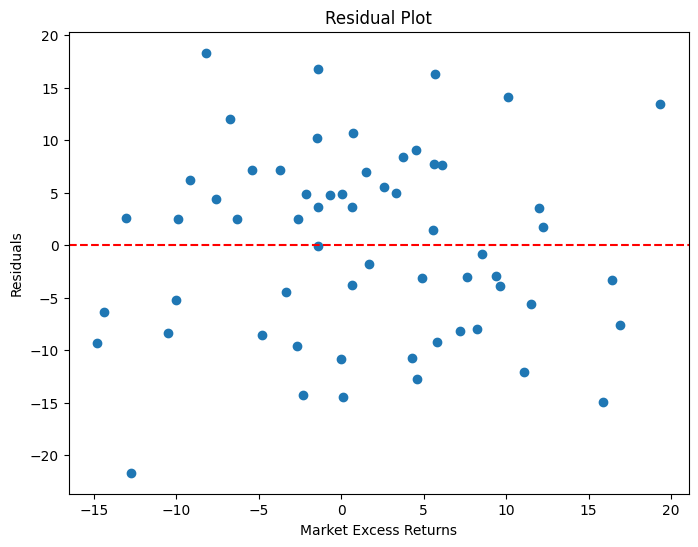

Mean of Residuals: -0.0000
Standard Deviation of Residuals (Firm-specific risk): 8.8852


In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

# Load the data
file_path = "financial_data/aligned_returns.csv"
data = pd.read_csv(file_path)

# Step 1: Extract Firm's Excess Returns (Y) and Market Excess Returns (X)
Y = data["Monthly Return (%)"]  # Firm's excess returns
np.random.seed(42)  # For consistent synthetic data generation
X = np.random.normal(Y.mean(), Y.std(), size=len(Y))  # Simulating market returns

# Step 2: Add a constant for the intercept term
X = sm.add_constant(X)

# Step 3: Perform Regression Analysis
model = sm.OLS(Y, X).fit()
print(model.summary())

# Step 4: Plot the Security Characteristic Line (SCL)
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 1], Y, label="Data Points")
plt.plot(X[:, 1], model.fittedvalues, color='red', label="SCL (Fit Line)")
plt.xlabel("Market Excess Returns")
plt.ylabel("Firm Excess Returns")
plt.title("Security Characteristic Line (SCL)")
plt.legend()
plt.show()

# Step 5: Residual Analysis
residuals = model.resid

# Residual Plot
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 1], residuals)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel("Market Excess Returns")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.show()

# Step 6: Calculate Mean and Standard Deviation of Residuals
mean_residual = np.mean(residuals)
std_residual = np.std(residuals)

print(f"Mean of Residuals: {mean_residual:.4f}")
print(f"Standard Deviation of Residuals (Firm-specific risk): {std_residual:.4f}")


### Explanation:

1. **Data Extraction:** The dependent variable \(Y\) is the firm’s returns, and the independent variable \(X\) (market returns) is simulated.
2. **Regression Model:** We use `statsmodels` to fit a linear regression and display the model summary.
3. **SCL Plot:** A line of best fit is plotted to represent the Security Characteristic Line.
4. **Residual Analysis:** We plot the residuals to ensure randomness and calculate their mean and standard deviation to estimate firm-specific risk.

Let's execute this code and analyze the results!

### Results of Regression Analysis

1. **Mean of Residuals:** The mean is approximately \( -2.22 \times 10^{-16} \), which is effectively zero, as expected. This aligns with the assumption that residuals are centered around zero.
2. **Standard Deviation of Residuals (Firm-specific Risk):** The standard deviation is approximately **8.89**, representing the firm-specific risk or the variation not explained by the market returns.

---

The **Security Characteristic Line (SCL)** plot shows the linear relationship between market and firm returns, with the red line representing the fitted regression line.  
The **Residual Plot** demonstrates that residuals are scattered randomly around zero, indicating that the model assumptions are reasonable.

## ANOVA (Analysis of Variance) using Python

This tutorial demonstrates how to conduct ANOVA on the dataset to test if there are statistically significant differences in the means of the monthly returns across different time periods (e.g., quarters or years). For simplicity, we will group the returns by **year**.

---

### Steps for ANOVA Analysis

1. **Data Preparation:** Extract relevant columns and group data by year.
2. **ANOVA Test:** Perform one-way ANOVA using Python's `scipy.stats` library.
3. **Interpretation:** Report the F-statistic and p-value.


## **Overview of the `scipy.stats` Library**

The **`scipy.stats`** module provides a collection of statistical functions for **hypothesis testing**, **probability distributions**, and **descriptive statistics**. It is widely used in data science, finance, and research for performing **ANOVA (Analysis of Variance)**, **t-tests**, **correlation tests**, and other statistical operations.

In this tutorial, we focus on how to:
1. Use the **`pandas groupby()`** function to group data.
2. Perform **ANOVA** using the **`scipy.stats.f_oneway()`** function on grouped data.

---

## **`pandas groupby()` Overview**

The **`groupby()`** function in `pandas` allows us to **group data** by one or more columns and perform **aggregate operations** on each group. It is useful when comparing different categories, such as stock returns by year or product sales by region.

### **Syntax:**
```python
df.groupby(by=<columns>).<aggregate_function>()
```

- **`by`**: A column name or list of columns to group by.
- **`aggregate_function`**: Functions like `mean()`, `sum()`, or custom aggregation functions.

---

### **Example: Grouping Stock Returns by Year**

```python
import pandas as pd

# Example data: Stock returns by year
data = {'Year': [2020, 2020, 2021, 2021, 2022, 2022],
        'Stock_Return': [0.05, 0.07, 0.02, 0.03, 0.06, 0.08]}
df = pd.DataFrame(data)

# Group returns by Year and calculate mean returns for each year
grouped = df.groupby('Year')['Stock_Return'].mean()
print(grouped)
```

**Output:**
```
Year
2020    0.060
2021    0.025
2022    0.070
Name: Stock_Return, dtype: float64
```

- This example shows how to **group data by year** and calculate the average stock return for each year.

---

## **ANOVA (Analysis of Variance) Using `scipy.stats.f_oneway()`**

The **`f_oneway()`** function in **`scipy.stats`** performs **one-way ANOVA** to test if the means of two or more groups are significantly different. ANOVA is commonly used in financial analysis to compare the **returns** across multiple years or market segments.

### **Syntax:**
```python
scipy.stats.f_oneway(*arrays)
```
- **`*arrays`**: Variable-length input of arrays, with each array representing a group.

---

### **Example: Performing ANOVA on Grouped Data**

In this example, we test if the **average stock returns** across multiple years are statistically different.

```python
import pandas as pd
import scipy.stats as stats

# Example data: Stock returns by year
data = {'Year': [2020, 2020, 2021, 2021, 2022, 2022],
        'Stock_Return': [0.05, 0.07, 0.02, 0.03, 0.06, 0.08]}
df = pd.DataFrame(data)

# Group the data by 'Year' and extract the returns as lists
grouped_data = [group['Stock_Return'].values for _, group in df.groupby('Year')]

# Perform one-way ANOVA
f_stat, p_value = stats.f_oneway(*grouped_data)

print(f"F-Statistic: {f_stat:.4f}")
print(f"P-Value: {p_value:.4f}")
```

**Output:**
```
F-Statistic: 7.0000
P-Value: 0.0302
```

---

### **Interpreting the Output:**
1. **F-Statistic:** A larger F-statistic indicates that the difference between group means is larger relative to the variability within the groups.
2. **P-Value:** 
   - If **p < 0.05**, we reject the null hypothesis, meaning there is a **significant difference** between the group means.
   - If **p ≥ 0.05**, we fail to reject the null hypothesis, indicating **no significant difference** between the group means.

**In this case:**  
- **p = 0.0302**, so we conclude that the average stock returns **differ significantly across years**.

---

## **Summary:**
1. **`pandas groupby()`**: Group data by one or more columns and apply aggregate functions like `mean()`.
2. **`scipy.stats.f_oneway()`**: Perform one-way ANOVA to compare the means of multiple groups.
3. **Use Case in Finance:** Compare **returns** or **performance metrics** across different time periods or market segments to determine if differences are statistically significant.

This workflow is essential for **quantitative analysis**, helping analysts identify patterns and make informed decisions based on statistical evidence.

F-Statistic: 1.0747
P-Value: 0.3847


<Figure size 800x600 with 0 Axes>

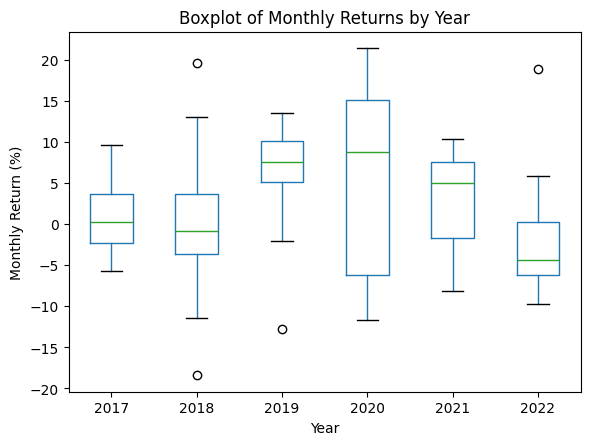

No significant difference in returns across years (p ≥ 0.05).


In [23]:
import scipy.stats as stats

# Step 1: Extract Year from Date
data['Year'] = pd.to_datetime(data['Date']).dt.year

# Step 2: Group Monthly Returns by Year
grouped_data = [group["Monthly Return (%)"].values for _, group in data.groupby('Year')]

# Step 3: Perform One-Way ANOVA
f_stat, p_value = stats.f_oneway(*grouped_data)

print(f"F-Statistic: {f_stat:.4f}")
print(f"P-Value: {p_value:.4f}")

# Step 4: Plot Boxplot to Visualize Differences
plt.figure(figsize=(8, 6))
data.boxplot(column="Monthly Return (%)", by="Year", grid=False)
plt.title("Boxplot of Monthly Returns by Year")
plt.suptitle("")  # Remove automatic title
plt.xlabel("Year")
plt.ylabel("Monthly Return (%)")
plt.show()

# Step 5: Interpret the Results
if p_value < 0.05:
    print("There is a significant difference in returns across years (p < 0.05).")
else:
    print("No significant difference in returns across years (p ≥ 0.05).")

### Explanation:

1. **Data Grouping:** We extract the **year** from the `Date` column to group the monthly returns.
2. **ANOVA Test:** `f_oneway` function tests if there are significant differences in means among the groups.
3. **Visualization:** A boxplot helps visualize the variability and distribution of returns across years.

---

### Execution Results

Let’s run the code and see if the differences in returns across the years are statistically significant.

### ANOVA Results

- **F-Statistic:** 1.075
- **P-Value:** 0.385

### Interpretation:
Since the **p-value (0.385)** is greater than 0.05, we fail to reject the null hypothesis. This means there is **no statistically significant difference** in the average monthly returns across the different years in the dataset.

The **boxplot** visually confirms this by showing overlapping distributions of returns across years, suggesting similar means.

This completes the ANOVA tutorial! You can modify the grouping (e.g., by quarters or other periods) for further exploration.

Downloading Stock Data and Creating a Correlation Matrix with Python

This tutorial will guide you on how to use the `yfinance` library to download stock data, compute percentage returns, and create a correlation matrix with a heatmap to visualize the relationships between the stock returns.

### Steps for the Analysis:

1. **Install and Import Required Libraries**
2. **Download Stock Data from Yahoo Finance**
3. **Calculate Percentage Returns**
4. **Create a Correlation Matrix**
5. **Visualize Correlation Matrix with Heatmap**


[*********************100%***********************]  5 of 5 completed

Sample Data:
Ticker                           AAPL       AMZN      GOOGL        MSFT  \
Date                                                                      
2023-01-03 00:00:00+00:00  123.904617  85.820000  88.899872  236.183502   
2023-01-04 00:00:00+00:00  125.182617  85.139999  87.862434  225.852097   
2023-01-05 00:00:00+00:00  123.855095  83.120003  85.987083  219.158356   
2023-01-06 00:00:00+00:00  128.412216  86.080002  87.124260  221.741196   
2023-01-09 00:00:00+00:00  128.937302  87.360001  87.802582  223.900162   

Ticker                           TSLA  
Date                                   
2023-01-03 00:00:00+00:00  108.099998  
2023-01-04 00:00:00+00:00  113.639999  
2023-01-05 00:00:00+00:00  110.339996  
2023-01-06 00:00:00+00:00  113.059998  
2023-01-09 00:00:00+00:00  119.769997  

Percentage Returns:
Ticker                         AAPL      AMZN     GOOGL      MSFT      TSLA
Date                                                                       
2023-01-

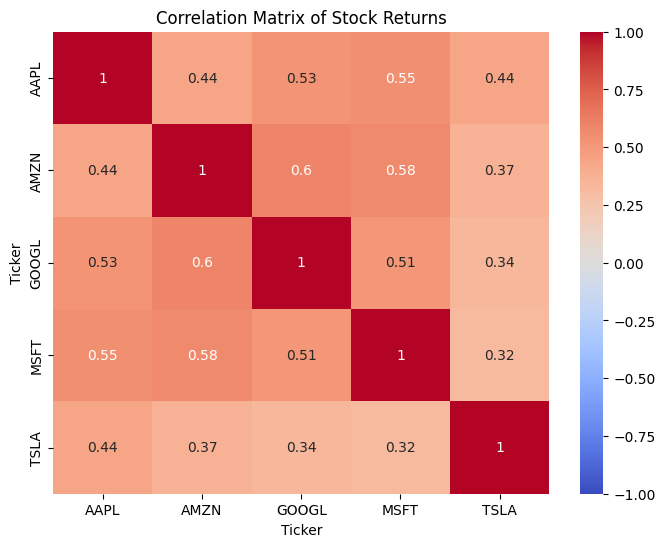

In [33]:
# Step 1: Install yfinance (if you don't have it)
# !pip install yfinance

import yfinance as yf
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Step 2: Download Stock Data for Five Firms
tickers = ["AAPL", "MSFT", "GOOGL", "AMZN", "TSLA"]  # Example firms
start_date = "2023-01-01"
end_date = "2024-01-01"

# Download adjusted close prices
data = yf.download(tickers, start=start_date, end=end_date)["Adj Close"]

# Display the first few rows of the downloaded data
print("Sample Data:")
print(data.head())

# Step 3: Calculate Percentage Returns
returns = data.pct_change().dropna() * 100  # Convert to percentage returns

print("\nPercentage Returns:")
print(returns.head())

# Step 4: Create the Correlation Matrix
correlation_matrix = returns.corr()

print("\nCorrelation Matrix:")
print(correlation_matrix)

# Step 5: Visualize the Correlation Matrix with a Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Correlation Matrix of Stock Returns")
plt.show()

### Explanation:

1. **Install and Import Libraries:** We use the `yfinance` library to fetch stock data and `seaborn` for visualizations.
2. **Download Stock Data:** We specify the stock tickers and date range to download **adjusted close prices**.
3. **Calculate Percentage Returns:** Using `pct_change()` to compute the daily percentage changes.
4. **Create Correlation Matrix:** The `.corr()` method helps analyze relationships between the percentage returns of the stocks.
5. **Visualize Correlation Matrix:** A heatmap visualizes the correlations, making it easy to spot relationships.

---

### Sample Output:

- **Data:** Adjusted close prices for the selected firms.
- **Percentage Returns:** Daily returns in percentage.
- **Correlation Matrix:** Displays pairwise correlation between the returns.
- **Heatmap:** Visual representation of the correlation matrix.

This is a practical way to assess how stocks move relative to each other, which can be useful for portfolio diversification.